In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv(r'C:\Users\POOJA ZAMBRE\Desktop\JN\archive\Shoes_Data.csv')
print(df.columns)
# Assuming 'text' is the column with the shoe reviews and 'label' is the sentiment
X = df['reviews']
y = df['reviews_rating']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['title', 'price', 'rating', 'total_reviews', 'product_description',
       'reviews', 'reviews_rating', 'Shoe Type'],
      dtype='object')


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# Create a simple pipeline with a TF-IDF vectorizer and RandomForestClassifier
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Train the model on the training set
model.fit(X_train, y_train)


Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('randomforestclassifier', RandomForestClassifier())])

In [27]:
from lime import lime_text

# Initialize LIME explainer
explainer = lime_text.LimeTextExplainer()

# Select a specific instance from the testing set for explanation
instance_index = 0  # Change this to any index in the testing set
instance = X_test.iloc[instance_index]

# Generate explanation
exp = explainer.explain_instance(instance, model.predict_proba)

In [28]:
# Visualize the explanation
exp.show_in_notebook(text=True)

# Compare LIME explanation with actual prediction
predicted_class = model.predict([instance])[0]
lime_explanation = exp.as_list()

print(f"Actual Sentiment: {y_test.iloc[instance_index]}")
print(f"Predicted Sentiment: {predicted_class}")
print(f"LIME Explanation: {lime_explanation}")

Actual Sentiment: 5.0 out of 5 stars|| 1.0 out of 5 stars|| 1.0 out of 5 stars|| 4.0 out of 5 stars|| 2.0 out of 5 stars|| 4.0 out of 5 stars|| 5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars
Predicted Sentiment: 4.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 out of 5 stars|| 1.0 out of 5 stars|| 1.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 out of 5 stars|| 4.0 out of 5 stars
LIME Explanation: [('Purchase', -0.0005062225366502524), ('Verified', -0.00048574725656192564), ('look', -0.00048419672904705867), ('Nice', 0.00023821581919878797), ('product', -0.00022299361623438538), ('received', 6.564059566894733e-05), ('Used', 2.244174788976775e-05)]


In [29]:
# Visualize the explanation using LIME's plotting functions
exp.show_in_notebook(text=True, predict_proba=True)


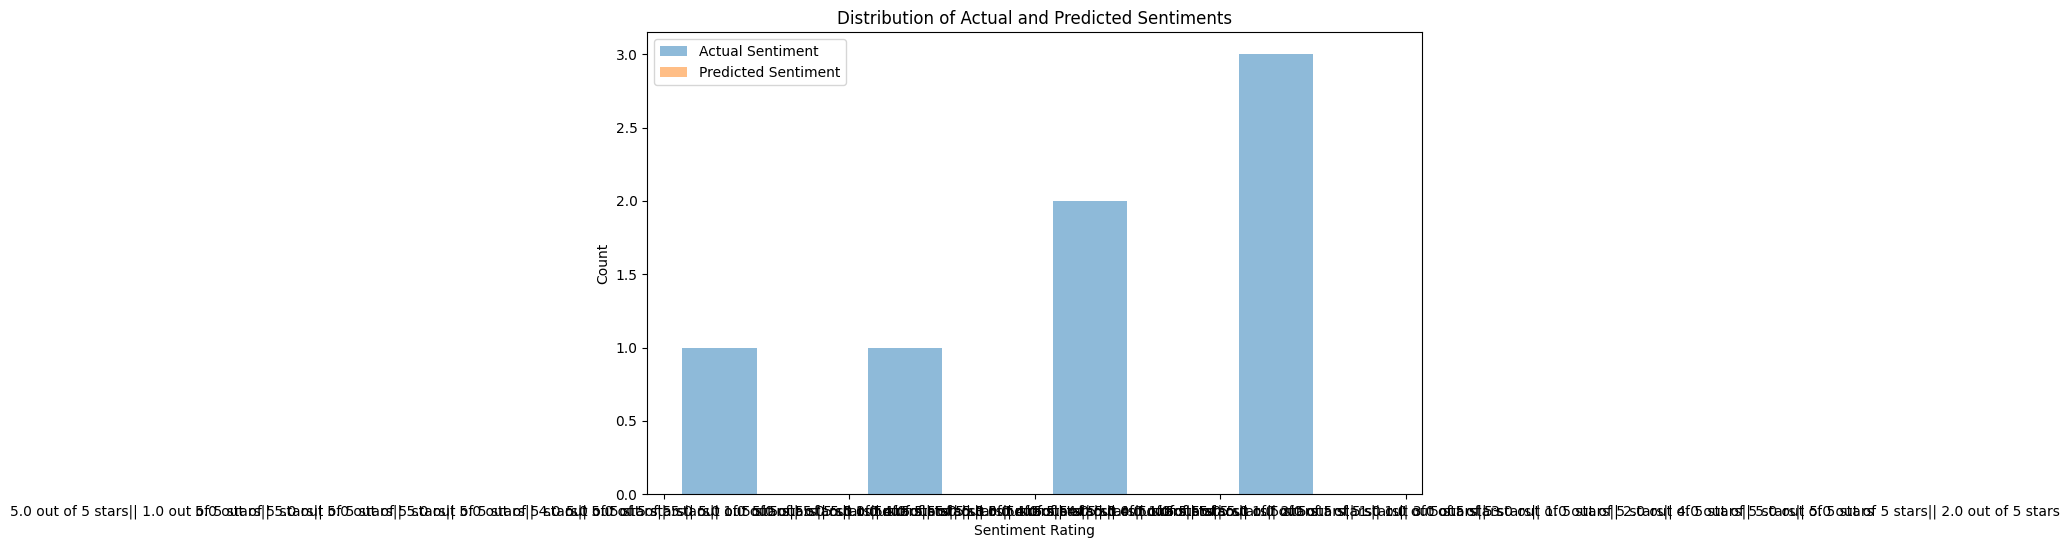

In [30]:
import matplotlib.pyplot as plt

# Visualize the distribution of actual and predicted sentiments
plt.figure(figsize=(10, 6))
plt.hist([y, predicted_class], bins=[1, 2, 3, 4, 5], alpha=0.5, label=['Actual Sentiment', 'Predicted Sentiment'])
plt.xlabel('Sentiment Rating')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Actual and Predicted Sentiments')
plt.show()


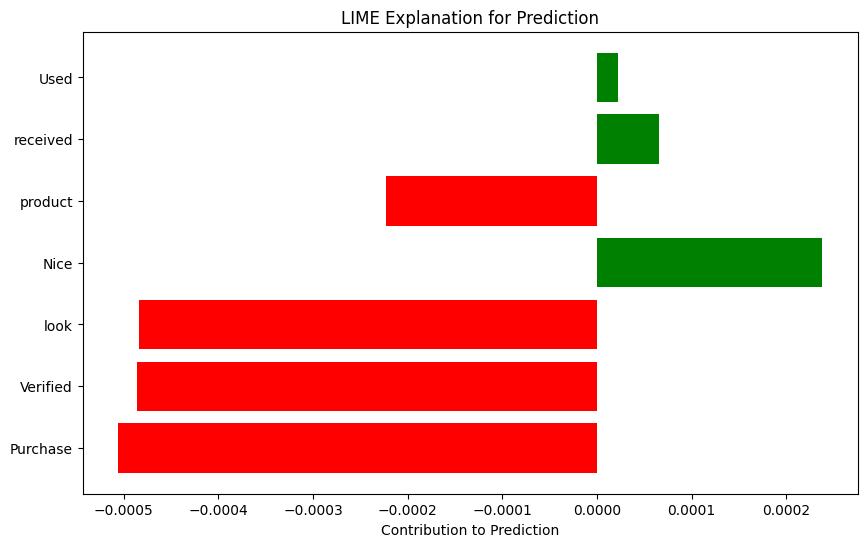

In [31]:
import matplotlib.pyplot as plt
import numpy as np
# Extract feature names and corresponding coefficients from LIME explanation
feature_names, coefficients = zip(*lime_explanation)

# Plot the LIME explanation
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in coefficients]
plt.barh(feature_names, coefficients, color=colors)
plt.xlabel('Contribution to Prediction')
plt.title('LIME Explanation for Prediction')
plt.show()

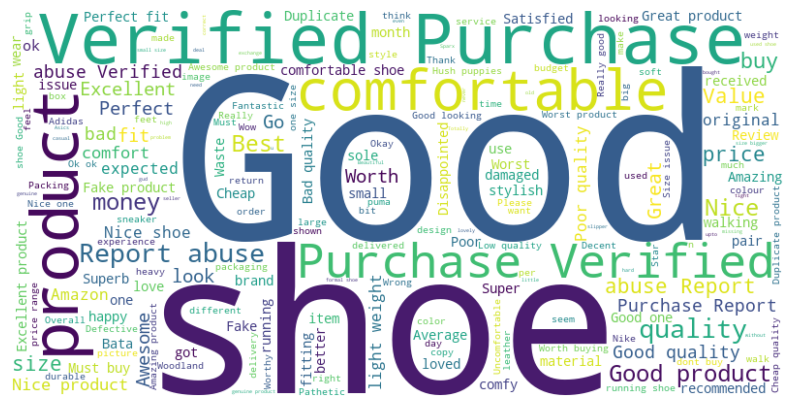

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
reviews = df['reviews'].tolist()

# Create a string by joining all reviews
text = " ".join(reviews)

# Generate word cloud
wordcloud = WordCloud(background_color="white", width=800, height=400, max_words=200).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

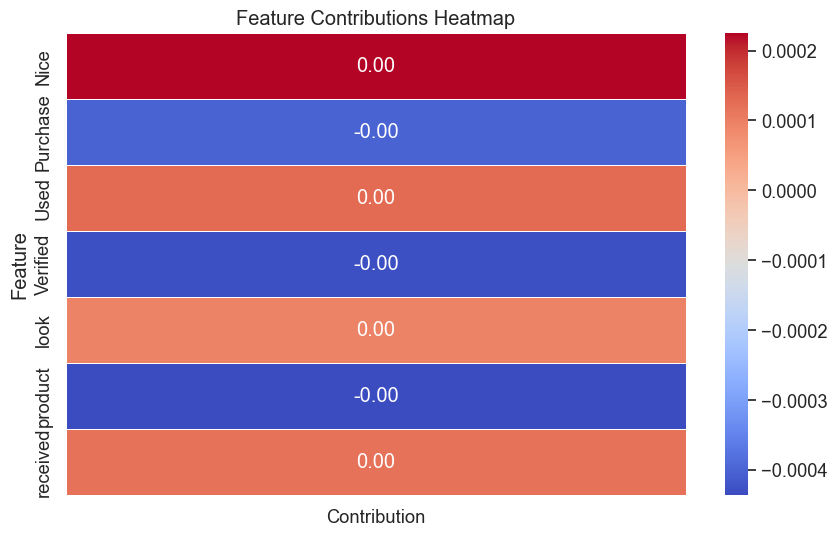

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from lime import lime_text
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
df = pd.read_csv(r'C:\Users\POOJA ZAMBRE\Desktop\JN\archive\Shoes_Data.csv')

# Assuming 'text' is the column with the shoe reviews and 'label' is the sentiment
X = df['reviews']
y = df['reviews_rating']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a simple pipeline with a TF-IDF vectorizer and RandomForestClassifier
model = make_pipeline(TfidfVectorizer(), RandomForestClassifier())

# Train the model on the training set
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = lime_text.LimeTextExplainer()

# Select a specific instance from the testing set for explanation
instance_index = 0  # Change this to any index in the testing set
instance = X_test.iloc[instance_index]

# Generate explanation
exp = explainer.explain_instance(instance, model.predict_proba)

# Compare LIME explanation with actual prediction
predicted_class = model.predict([instance])[0]
lime_explanation = exp.as_list()

# Extract feature names and corresponding coefficients from LIME explanation
feature_names, coefficients = zip(*lime_explanation)

# Create a heatmap for feature contributions
heatmap_data = pd.DataFrame(data={'Feature': feature_names, 'Contribution': coefficients})
heatmap_data['Contribution'] = heatmap_data['Contribution'].astype(float)

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(heatmap_data.pivot_table(index='Feature', values='Contribution'),
                      cmap="coolwarm", annot=True, fmt=".2f", linewidths=.5)
plt.title('Feature Contributions Heatmap')
plt.show()


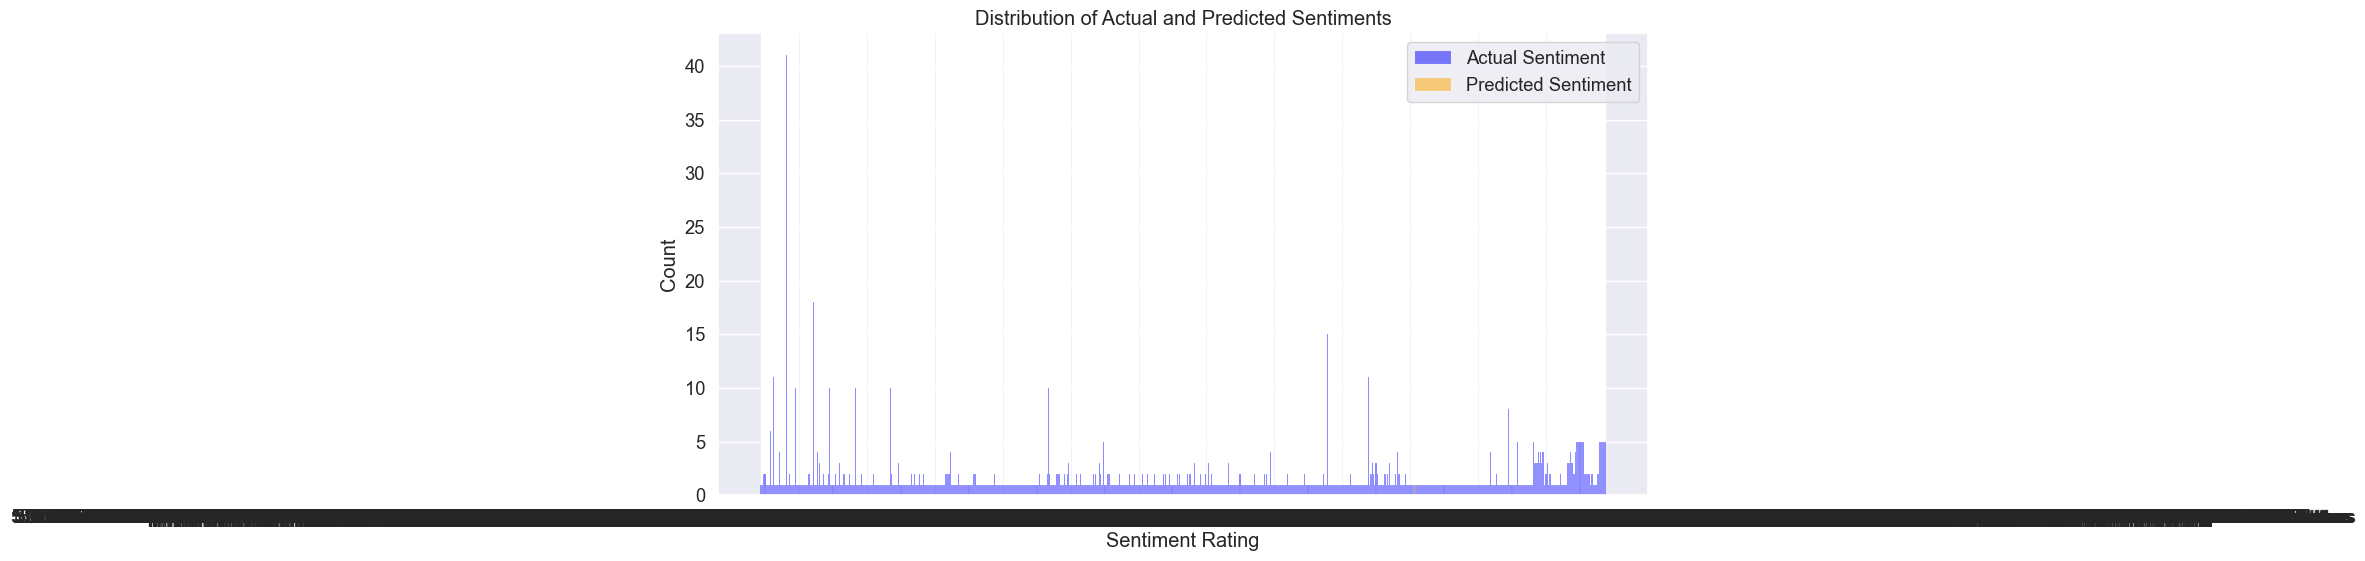

In [48]:
import seaborn as sns

# Assuming 'y' contains actual sentiments and 'predicted_class' contains predicted sentiments
plt.figure(figsize=(12, 6))
sns.histplot(y.fillna(-1), bins=[-1, 1, 2, 3, 4, 5], color='blue', alpha=0.5, label='Actual Sentiment')
sns.histplot(predicted_class, bins=[-1, 1, 2, 3, 4, 5], color='orange', alpha=0.5, label='Predicted Sentiment')
plt.xlabel('Sentiment Rating')
plt.ylabel('Count')
plt.legend()
plt.title('Distribution of Actual and Predicted Sentiments')
plt.show()
